Homework 1 - Zeri di Funzione

Definiamo le funzioni su cui applicare i metodi numerici e visualizziamole sul piano cartesiano:

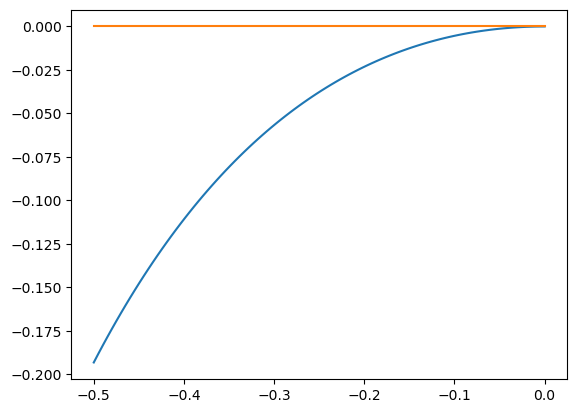

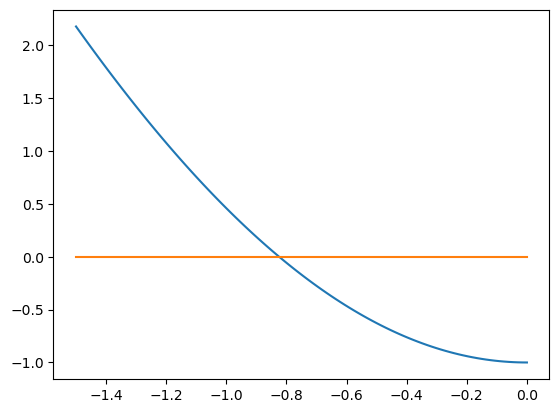

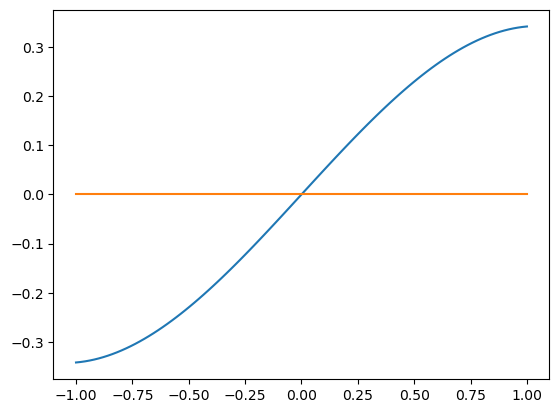

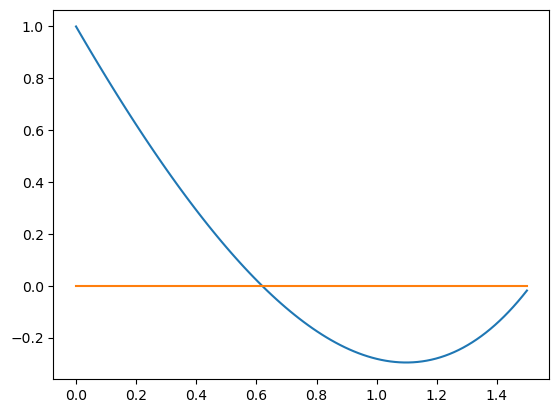

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f1=lambda x: np.log(x+1)-x
f2=lambda x: x**2-np.cos(x)
f3=lambda x: np.sin(x)-(x/2)
f4=lambda x: np.exp(x)-3*x


a1=-0.5; b1=0; 
x1=np.linspace(a1,b1,100)
y1=f1(x1)
xAxis1=np.zeros_like(x1)

#plt.subplot(2,2,1)
plt.plot(x1,y1)
plt.plot(x1,xAxis1)
plt.show()


a2=-1.5; b2=0; 
x2=np.linspace(a2,b2,100)
y2=f2(x2)
xAxis2=np.zeros_like(x2)

#plt.subplot(2,2,2)
plt.plot(x2,y2)
plt.plot(x2,xAxis2)
plt.show()


a3=-1; b3=1; 
x3=np.linspace(a3,b3,100)
y3=f3(x3)
xAxis3=np.zeros_like(x3)

#plt.subplot(2,2,3)
plt.plot(x3,y3)
plt.plot(x3,xAxis3)
plt.show()


a4=0; b4=1.5; 
x4=np.linspace(a4,b4,100)
y4=f4(x4)
xAxis4=np.zeros_like(x4)

#plt.subplot(2,2,4)
plt.plot(x4,y4)
plt.plot(x4,xAxis4)
plt.show()

Metodo di Bisezione

In [2]:



def bisezione(f,a,b,N,t):
    
    x=np.linspace(a,b,100)
    xAxis=np.zeros_like(x)
    plt.figure()
    plt.plot(x,f(x))
    plt.plot(x,xAxis)


    if(f(a)*f(b)>0):
        raise ValueError("f(a)*f(b)>0")

    if(np.abs(f(a))<t): return a
    elif(np.abs(f(b))<t): return b
    
    for i in range(N):
        c=(a+b)/2
        fc=f(c)

        plt.plot(c,np.abs(fc),'.',color='r')    #se togli abs(fc) e metti solo fc viene bene

        if(abs(fc)<t):
            return c
        elif(f(a)*fc<0):
            b=c
        else:
            a=c
            
    plt.show()
    return c
    

Applichiamo ora il metodo della bisezione sulle varie funzioni:

Uno zero di f1 è in x=0
Il valore di f1 in x1Star è 0.0
Uno zero di f2 è in x=-0.8241323122638278
Il valore di f2 in x2Star è -9.217926422167011e-11
Uno zero di f3 è in x=0.0
Il valore di f3 in x3Star è 0.0
Uno zero di f4 è in x=0.6190612867358141
Il valore di f4 in x4Star è 1.496580637194711e-13


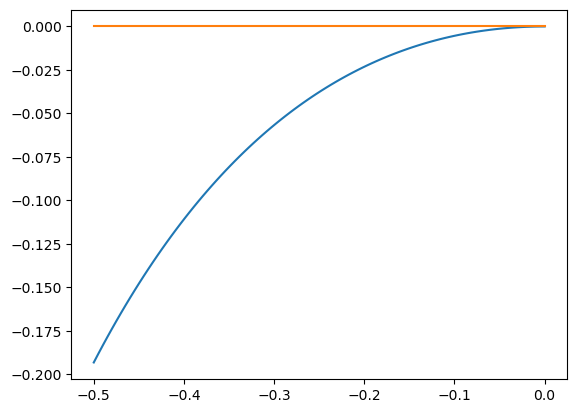

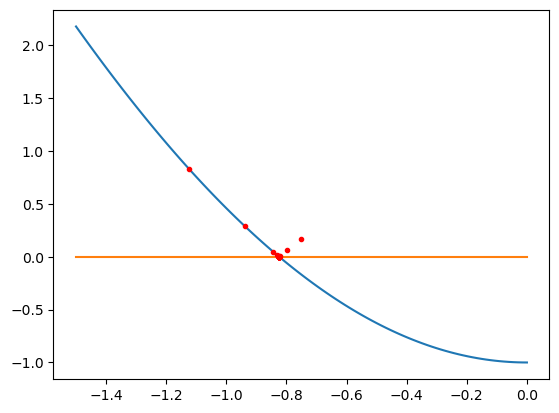

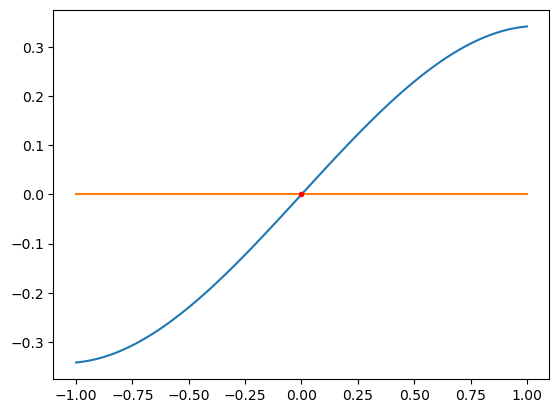

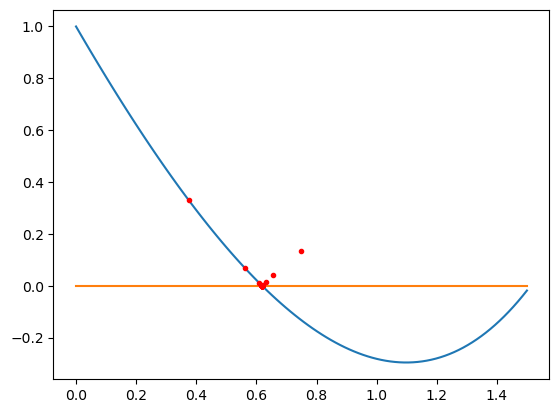

In [3]:
iter=50
toll=1.e-10

x1Star=bisezione(f1,a1,b1,iter,toll)
print(f"Uno zero di f1 è in x={x1Star}")
f1val=f1(x1Star)
print(f"Il valore di f1 in x1Star è {f1val}")

x2Star=bisezione(f2,a2,b2,iter,toll)
print(f"Uno zero di f2 è in x={x2Star}")
f2val=f2(x2Star)
print(f"Il valore di f2 in x2Star è {f2val}")

x3Star=bisezione(f3,a3,b3,iter,toll)
print(f"Uno zero di f3 è in x={x3Star}")
f3val=f3(x3Star)
print(f"Il valore di f3 in x3Star è {f3val}")

x4Star=bisezione(f4,a4,b4,iter,toll)
print(f"Uno zero di f4 è in x={x4Star}")
f4val=f4(x4Star)
print(f"Il valore di f4 in x4Star è {f4val}")

Usiamo adesso il metodo del punto fisso. Ci serve quindi definire le funzioni g su cui applicare il metodo iterativo e anche le loro derivate per controllare che g sia una contrazione.

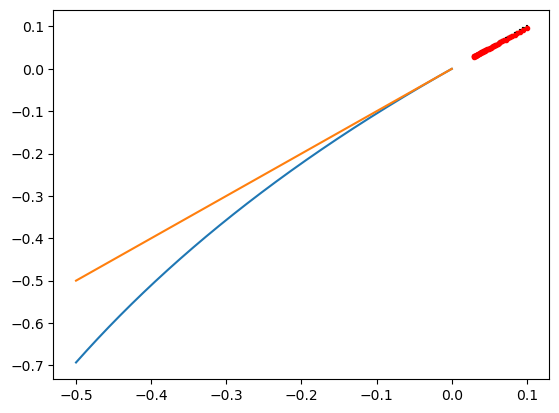

Uno zero di f1 è in x=0.028741268834829293
Il valore di f1 in x1Star è -0.0004052830210427051


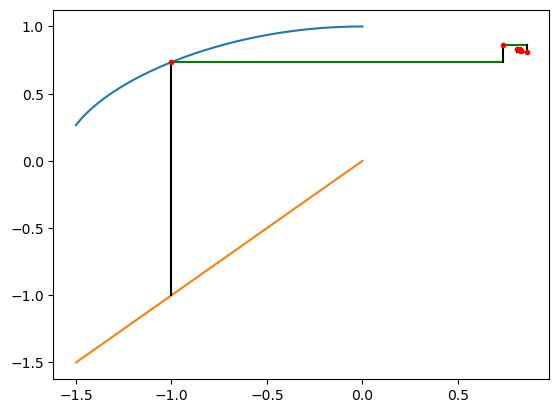

Uno zero di f2 è in x=0.8241323122402889
Il valore di f2 in x2Star è -1.4825407568253013e-10


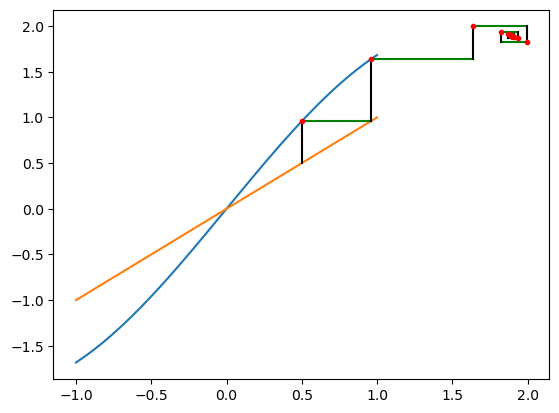

Uno zero di f3 è in x=1.8954942671452462
Il valore di f3 in x3Star è -9.112866017346732e-11


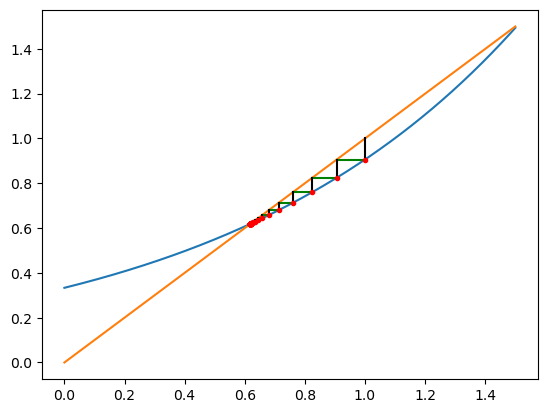

Uno zero di f4 è in x=0.6190612869277846
Il valore di f4 in x4Star è -2.1923729498496414e-10


In [ ]:
g1=lambda x: np.log(x+1)
g2=lambda x: (np.cos(x))**(1/2)
g3=lambda x: 2*np.sin(x)
g4=lambda x: np.exp(x)/3

dg1 = lambda x: 1/(x+1)
dg2 = lambda x: -np.sin(x) / (2 * np.sqrt(np.cos(x)))
dg3 = lambda x: 2 * np.cos(x)
dg4 = lambda x: np.exp(x) / 3



def puntoFisso(f,g,x0,t1,t2,N,a,b):

    x=np.linspace(a,b,1000)
    plt.figure()
    plt.plot(x,g(x))
    plt.plot(x,x)

    #controllo g(x) contrazione??? abs(g'(x))<1???

    cont=0
    while(np.abs(f(x0))>t1 and cont<N):

        plt.plot([x0,x0],[x0,g(x0)],'k')

        xNew=g(x0)

        #connect
        plt.plot([x0,g(x0)],[xNew,xNew],'k')
        plt.plot(x0,np.abs(g(x0)),'.',color='r')    #se togli abs(fx0) e metti solo fx0 viene bene

        delta=np.abs(x0-xNew)
        if(delta<t2): 
            break
        x0=xNew
        cont+=1

    plt.show()
    return x0


x1Star=puntoFisso(f1,g1,0.1,toll,toll,iter,a1,b1)   #servono tante tante iterazioni iter*1000
print(f"Uno zero di f1 è in x={x1Star}")
f1val=f1(x1Star)
print(f"Il valore di f1 in x1Star è {f1val}")   

x2Star=puntoFisso(f2,g2,-1,toll,toll,iter,a2,b2)
print(f"Uno zero di f2 è in x={x2Star}")
f2val=f2(x2Star)
print(f"Il valore di f2 in x2Star è {f2val}")   #trova uno zero diverso

x3Star=puntoFisso(f3,g3,0.5,toll,toll,iter,a3,b3)
print(f"Uno zero di f3 è in x={x3Star}")
f3val=f3(x3Star)
print(f"Il valore di f3 in x3Star è {f3val}")

x4Star=puntoFisso(f4,g4,1,toll,toll,iter,a4,b4)
print(f"Uno zero di f4 è in x={x4Star}")
f4val=f4(x4Star)
print(f"Il valore di f4 in x4Star è {f4val}")

Usiamo infine il metodo di Newton: definiamo le derivate prime delle funzioni f e utilizziamole come g nel metodo del punto fisso:

C:\Users\Locadmin\AppData\Local\Temp\ipykernel_3852\410643967.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,x-1/df(x))


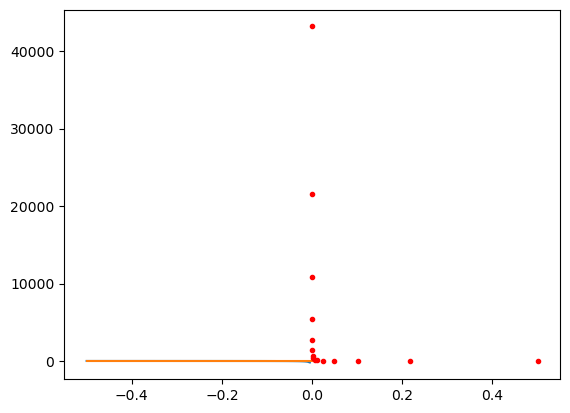

Uno zero di f1 è in x=1.157441599792691e-05
Il valore di f1 in x1Star è -6.698310143175975e-11


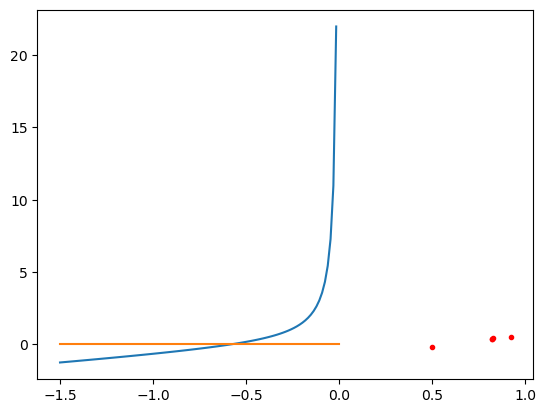

Uno zero di f2 è in x=0.8241323123025224
Il valore di f2 in x2Star è -1.1102230246251565e-16


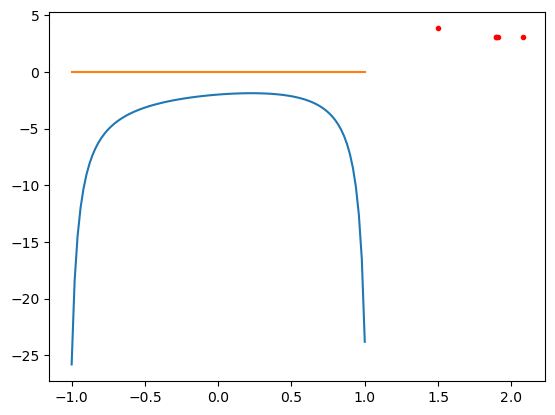

Uno zero di f3 è in x=1.8954942670339812
Il valore di f3 in x3Star è -2.220446049250313e-16


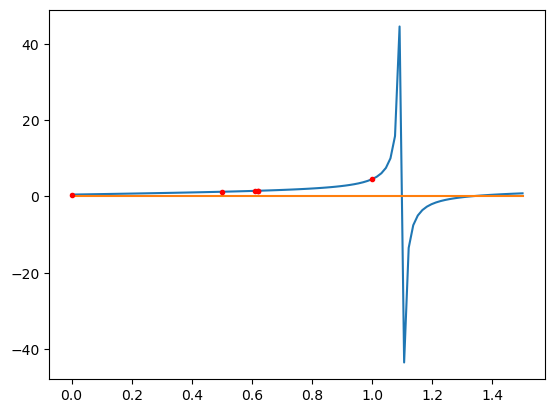

Uno zero di f4 è in x=0.6190612867359452
Il valore di f4 in x4Star è -2.220446049250313e-16


In [5]:
df1=lambda x: 1/(x+1)-1
df2=lambda x: 2*x+np.sin(x)
df3=lambda x: np.cos(x)-(1/2)
df4=lambda x: np.exp(x)-3


def newton(f,df,x0,t1,t2,N,a,b):
    x=np.linspace(a,b,100)
    xAxis=np.zeros_like(x)
    plt.figure()
    plt.plot(x,x-1/df(x))
    plt.plot(x,xAxis)

    cont=0
    while(np.abs(f(x0))>t1 and cont<N): 
        plt.plot(x0,x0-1/df(x0),'.',color='r')    #se togli abs(fx0) e metti solo fx0 viene bene
        xNew=x0-f(x0)/df(x0)
        delta=np.abs(x0-xNew)
        if(delta<t2): 
            break
        x0=xNew
        cont+=1
    plt.show()
    return x0



x1Star=newton(f1,df1,0.5,toll,toll,iter,a1,b1)
print(f"Uno zero di f1 è in x={x1Star}")
f1val=f1(x1Star)
print(f"Il valore di f1 in x1Star è {f1val}")   

x2Star=newton(f2,df2,0.5,toll,toll,iter,a2,b2)
print(f"Uno zero di f2 è in x={x2Star}")
f2val=f2(x2Star)
print(f"Il valore di f2 in x2Star è {f2val}")

x3Star=newton(f3,df3,1.5,toll,toll,iter,a3,b3)
print(f"Uno zero di f3 è in x={x3Star}")
f3val=f3(x3Star)
print(f"Il valore di f3 in x3Star è {f3val}")

x4Star=newton(f4,df4,1,toll,toll,iter,a4,b4)
print(f"Uno zero di f4 è in x={x4Star}")
f4val=f4(x4Star)
print(f"Il valore di f4 in x4Star è {f4val}")